<a href="https://colab.research.google.com/github/tobias-hoepfl/Digital-Organizations-SE/blob/main/learning_portfolio/5_gradient_calculation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Learning Portfolio: Gradient calculation from scratch

**Goal:** 

Implement the gradient calculation for one weight from scratch.

<br>

**Manual example used as a guide:** 

https://mattmazur.com/2015/03/17/a-step-by-step-backpropagation-example/

There is an implementation by the same author (https://github.com/mattm/simple-neural-network/blob/master/neural-network.py), but I did not look at it, but implemented on my own and played around with it, just using the instruction.

I focused on the example structure and numbers from the article and went through the important steps described there. So the neural network implemenation provided here is not necessarily expected to work in a generalized way when the number of layers/neurons is changed.

## Important learnings from reading the article:



- Forward propagation calculates the output layer by layer, starting from input data.
- Backward propagation calculates the error between output and expected output which allows us to adjust weights and biases accordingly.
- The example demonstrates error calculation and adjustment of weights and biases using only one round of gradient descent optimization
- The error therefore only changes a bit, but when this is done hundreds of times the improvment gets substantial
- The chain rule of calculus is used to calculate gradients of error with respect to weights and biases. This part is the most tricky and abstract part of training a neural network, but can be basically broken up to those simple rules of calculus.
- Sigmoid is used as an activation function in the given example
- The learning rate controls the magnitude of weight and bias adjustments during training.

## Implementation based on the example from the article

### Forward propagation

I rebuild the structure used in the article with two inputs and two outputs. I first implemented forward propagation and made sure that I got the same initial predictions as in the article

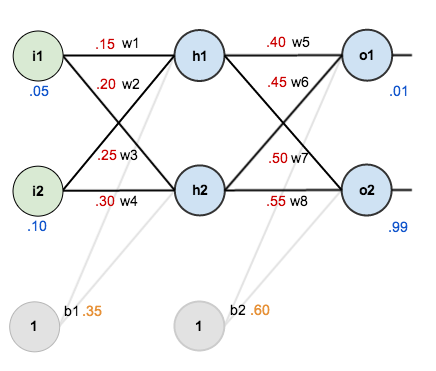

In [ ]:
import torch
import math

In [ ]:
class NeuralNetwork:
  #weights is a list of tensors, where each tensor represents a layer
  def __init__(self, weights, biases):
    self.weights = weights
    self.biases = biases
    
  def forward(self, inputs):

    #forward propagation
    for layer in range(len(weights)):
      layer_outputs = []    
      for neuron in range(weights[layer].shape[0]):
        neuron_value_before_sigmoid = weights[layer][neuron]@inputs + biases[layer]
        #sigmoid
        neuron_value = 1/(1+ 2.718 **(-neuron_value_before_sigmoid))
        layer_outputs.append(neuron_value)
      
      #Output layer
      if layer == 1:
        return torch.stack(layer_outputs)

      else:
        #Outputs of hidden layer are inputs for next layer
        inputs = torch.tensor(layer_outputs)

In [ ]:
#initialize neural network

#same numbers as used in the article
weights = [
    #first layer weights for the two neurons
    torch.tensor([[0.15, 0.2], [0.25, 0.3]]),
    #second layer weights for the two neurons
    torch.tensor([[0.4, 0.45], [0.5, 0.55]])
]

#index refers to the layer
biases = torch.tensor([0.35, 0.6])

#Forward propagation using the example data from the article

nn = NeuralNetwork(weights, biases)

#inputs
input_example = torch.tensor([0.05, 0.1])

#forward propagation
#I get the same result as did the author of the article
output = nn.forward(input_example)
print('Initial output: ', output)

Initial output:  tensor([0.7513, 0.7729])


In forward propagation I got the same prediction as mentioned in the article. 

## Calculate the error

The error function we use (mean squared error): 
$E_{total} = \sum \frac{1}{2}(target - output)^{2}$

We use $\frac{1}{2}$ because it makes working with the derivation (see below) easier


In [ ]:
def mse(target, output): return sum(1/2*(target-output)**2)

In [ ]:
#actual labels for the given input
target = torch.tensor([0.01, 0.99])

In [ ]:
#total error
mse(target, output)

tensor(0.2984)

## Calculate the gradients

In order to find out which weight has to improved in which direction we need the gradients. This is the part where it gets harder because we need partial derivation and the chain rule from calculus.

### Calculate gradients for the output layer



We first look at w5. $\frac{\partial E_{total}}{\partial w_{5}}$ refers to the partial derivation of the total error with respect to w5, which means that this is the gradient of w5. By using the chain rule, $\frac{\partial E_{total}}{\partial w_{5}}$ can be split up into three parts that we multiply as shown in the following graph from the article:

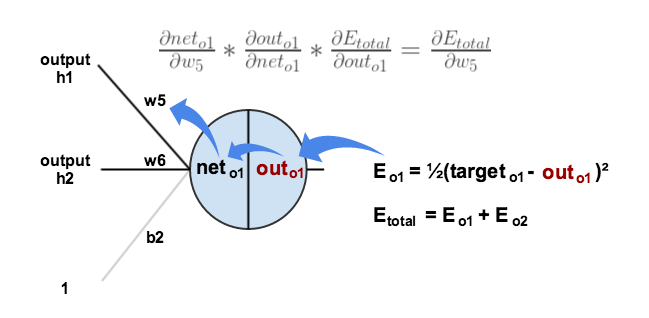

$net$ refers to the part of the function before using sigmoid, $out$ refers to the function after applying sigmoid.

Here the three derivations summarized from the article:

<br>


What we need: 

$\frac{\partial E_{total}}{\partial w_{1}} = \frac{\partial E_{total}}{\partial out_{h1}} * \frac{\partial out_{h1}}{\partial net_{h1}} * \frac{\partial net_{h1}}{\partial w_{1}}$

<br>

**Total error:**

$E_{total} = \frac{1}{2}(target_{o1} - out_{o1})^{2} + \frac{1}{2}(target_{o2} - out_{o2})^{2}$

Take the derivation with respect to the output of $o1$:

$\frac{\partial E_{total}}{\partial out_{o1}} = 2 * \frac{1}{2}(target_{o1} - out_{o1})^{2 - 1} * -1 + 0 = - (target_{o1} - out_{o1})$

<br>

**Sigmoid function:**

$out_{o1} = \frac{1}{1+e^{-net_{o1}}}$

Derivation:

$\frac{\partial out_{o1}}{\partial net_{o1}} = out_{o1}(1 - out_{o1})$

<br>

**Net input:**

$net_{o1} = w_5 * out_{h1} + w_6 * out_{h2} + b_2 * 1$

Derivation:

$\frac{\partial net_{o1}}{\partial w_{5}} = 1 * out_{h1} * w_5^{(1 - 1)} + 0 + 0 = out_{h1}$

<br>

For the total derivation just multiply the three:


$\frac{\partial E_{total}}{\partial w_{1}} = \frac{\partial E_{total}}{\partial out_{h1}} * \frac{\partial out_{h1}}{\partial net_{h1}} * \frac{\partial net_{h1}}{\partial w_{1}} = (- (target_{o1} - out_{o1})) * out_{o1}(1 - out_{o1}) * out_{h1}$


### Implementation

In [ ]:
class NeuralNetwork:
  #weights is a list of tensors, where each tensor represents a layer
  def __init__(self, weights, biases):
    self.weights = weights
    self.biases = biases
    
  def forward(self, inputs):

    #forward propagation
    for layer in range(len(weights)):
      layer_outputs = []    
      for neuron in range(weights[layer].shape[0]):
        neuron_value_before_sigmoid = weights[layer][neuron]@inputs + biases[layer]
        #sigmoid
        neuron_value = 1/(1+ 2.718 **(-neuron_value_before_sigmoid))
        layer_outputs.append(neuron_value)
      
      #Output layer
      if layer == 1:
        return torch.stack(layer_outputs)

      else:
        #Outputs of hidden layer are inputs for next layer
        inputs = torch.tensor(layer_outputs)
    
  def gradients(self, inputs, targets):
    #first calculate the outputs for the inputs with the current weights
    outputs = self.forward(inputs)
    gradients = []

    #get output of the hidden layer
    for layer in range(len(weights)):
      layer_outputs = []    
      for neuron in range(weights[layer].shape[0]):
        neuron_value_before_sigmoid = weights[layer][neuron]@inputs + biases[layer]
        #sigmoid
        neuron_value = 1/(1+ 2.718 **(-neuron_value_before_sigmoid))
        layer_outputs.append(neuron_value)
      #skip after the first layer, so wie get the hidden layer outputs
      break;

    hidden_layer_results = torch.stack(layer_outputs)
    print('Outputs of hidden layers:', hidden_layer_results)
    for neuron in range(weights[layer].shape[0]):
      gradients.append((-(targets[neuron] - outputs[neuron]))*outputs[neuron]*(1-outputs[neuron])*hidden_layer_results[neuron])
    return gradients

In [ ]:
#initialize neural network

#same numbers as used in the article
weights = [
    #first layer weights for the two neurons
    torch.tensor([[0.15, 0.2], [0.25, 0.3]]),
    #second layer weights for the two neurons
    torch.tensor([[0.4, 0.45], [0.5, 0.55]])
]

#index refers to the layer
biases = torch.tensor([0.35, 0.6])

#Forward propagation using the example data from the article

nn = NeuralNetwork(weights, biases)

#inputs
input_example = torch.tensor([0.05, 0.1])

#forward propagation
#I get the same result as did the author of the article
output = nn.forward(input_example)
print('Initial output: ', output)

#gradient calculation
targets = torch.tensor([0.01, 0.99])
grad = nn.gradients(input_example, targets)
print('Gradients of output layer weights:', grad)

Initial output:  tensor([0.7513, 0.7729])
Outputs of hidden layers: tensor([0.5933, 0.5969])
Gradients of output layer weights: [tensor(0.0822), tensor(-0.0227)]


Now we have optained the correct gradients for the weights of the output layer. As one can see, they correspond to the article. This is only the first step, though. The next step would be to calculate the gradients for the hidden layers which I did not do (but is very similar). Finally, one would need to chose a learning rate to multiply the gradient with and iterating the same procedure again and again. In that way we obtain the weights that minimize (at least a local minimum) the error. As this part was already done by us (see the fastAI course), it is not given here.